<a href="https://colab.research.google.com/github/rockaguirre/Neuro-140-Project/blob/main/neuro140_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img

from PIL import Image, ImageEnhance

In [2]:
train_directory = '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Training'
test_directory = '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Testing'

In [3]:
classifications = ['notumor', 'glioma', 'meningioma', 'pituitary']
for i in classifications:
  path = os.path.join(train_directory, i)
  for image in os.listdir(path):
    image_array = cv2.imread(os.path.join(path,image))

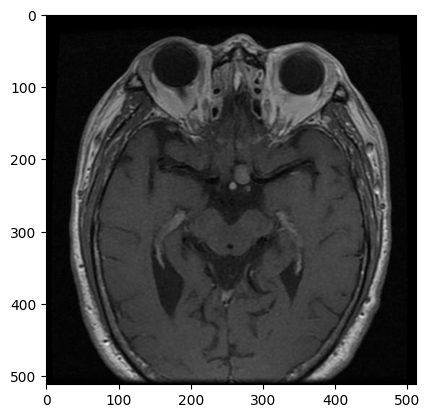

In [6]:
plt.imshow(image_array)

In [4]:
classifications = ['notumor', 'glioma', 'meningioma', 'pituitary']
for i in classifications:
  path = os.path.join(test_directory, i)
  for image in os.listdir(path):
    image_array = cv2.imread(os.path.join(path,image))

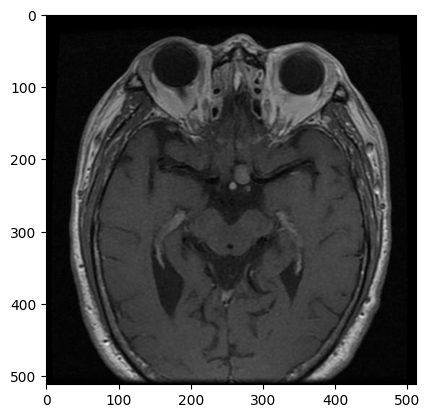

In [5]:
plt.imshow(image_array)

In [7]:
image_array.shape

(512, 512, 3)

In [15]:
general_model = VGG16(input_shape=(image_size,image_size,3), include_top=False, weights='imagenet')
# set beginning layers to non-trainable to retain pre-trained weights from imagenet

for layer in general_model.layers:
    layer.trainable=False


In [ ]:
#def preprocess_image(image_path):
  #  image = cv2.imread(image_path)
 #   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #  return gray

In [ ]:
# first CNN model
first_model = Sequential()

# first convolutional layer
first_model.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu')) # convolution function on 2d image
first_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model, applies the rectified linear unit activation function
first_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map


# second layer
first_model.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu')) # convolution function on 2d image
first_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model
first_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map
          
first_model.add(Flatten()) # makes input data 1d versus 2d but will not affect batch size

# will need to use Dense (matrix vector multiplication) & Dropout (prevents overfitting, not sure how) functions

first_model.add(Dense(units=252, activation='relu'))
first_model.add(Dropout(0.2))
first_model.add(Dense(units=252, activation='relu'))
first_model.add(Dropout(0.2))
first_model.add(Dense(units=4, activation='softmax'))

callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir)]
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=callbacks, validation_data=(x_valid, y_valid))

input_shape=(300,300,3)
first_model.build(input_shape)
first_model.summary()

# summary should give trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
first_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.05)

validation_datagen = ImageDataGenerator(validation_split=0.05)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Training',
    target_size=(64, 64),
    class_mode='binary',
    color_mode='grayscale',
    subset='training',
    seed=0)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Testing',
    target_size=(64, 64),
    class_mode='binary',
    color_mode='grayscale',
    subset='validation',
    seed=0)

Found 5429 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [ ]:
#train first_model
keras.utils.plot_model(first_model, show_shapes=True)

In [ ]:
batch_size = 20
steps=int(len())
first_history = first_model.fit(validation_generator, epochs=5, verbose=1)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
second_model = Sequential()

second_model.add(SeparableConv2D(32,(3,3), input_shape=(64,64,1), padding='same', activation='relu')) # convolution function on 2d image
second_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model, applies the rectified linear unit activation function
second_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map

# second layer
second_model.add(SeparableConv2D(128, (7,7), input_shape=(64,64,1), padding='same', activation='relu')) # convolution function on 2d image
second_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model
second_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map

# third layer
second_model.add(SeparableConv2D(256, (7,7), input_shape=(64,64,1), padding='same', activation='relu')) # convolution function on 2d image
second_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model
second_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map

# fourth later
second_model.add(SeparableConv2D(512, (7,7), input_shape=(64,64,1), padding='same', activation='relu')) # convolution function on 2d image
second_model.add(BatchNormalization()) # applies transformation to normalize output of each layer, will help stabalize training process and improve performance of model
second_model.add(MaxPooling2D(pool_size=(2,2))) # calculates max value for the patches of the feature map

# will need to use Dense (matrix vector multiplication) & Dropout (prevents overfitting, not sure how) functions

second_model.add(Dense(units=252, activation='relu'))
second_model.add(Dropout(0.2))
second_model.add(Dense(units=252, activation='relu'))
second_model.add(Dropout(0.2))
second_model.add(Dense(4, activation='softmax'))

input_shape=(64,64,4)
second_model.build(input_shape)

#second_model.add(Flatten())

second_model.summary()

# summary should give trainable parameters

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_4 (Separab  (None, 64, 64, 32)       73        
 leConv2D)                                                       
                                                                 
 batch_normalization_28 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_5 (Separab  (None, 32, 32, 128)      5792      
 leConv2D)                                                       
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 128)     

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
second_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.1)
validation_datagen = ImageDataGenerator(validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Training',
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=0)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Neuro 140 Final Project/brain_mri_dataset/Testing',
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=0)

Found 5143 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


In [ ]:
second_model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
second_model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
second_model_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = second_model.fit(train_generator, steps_per_epoch=5712//32, epochs=5, validation_data=validation_generator, validation_steps= 1311//32,
                      callbacks=[second_model_es, second_model_rlr, second_model_mcp])

Epoch 1/5


ValueError: ignored